In [1]:
# Cell 1 – Import Libraries & Load Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Load dataset
df = pd.read_csv('/content/Zoo.csv')  # adjust path if needed
df.head()


,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Dataset Shape: (101, 18)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal name  101 non-null    object
 1   hair         101 non-null    int64 
 2   feathers     101 non-null    int64 
 3   eggs         101 non-null    int64 
 4   milk         101 non-null    int64 
 5   airborne     101 non-null    int64 
 6   aquatic      101 non-null    int64 
 7   predator     101 non-null    int64 
 8   toothed      101 non-null    int64 
 9   backbone     101 non-null    int64 
 10  breathes     101 non-null    int64 
 11  venomous     101 non-null    int64 
 12  fins         101 non-null    int64 
 13  legs         101 non-null    int64 
 14  tail         101 non-null    int64 
 15  domestic     101 non-null    int64 
 16  catsize      101 non-null    int64 
 17  type         101 non-null    int64 
dtypes: int64(17), object(1)
memory

/tmp/ipython-input-2871016975.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='type', data=df, palette='viridis')


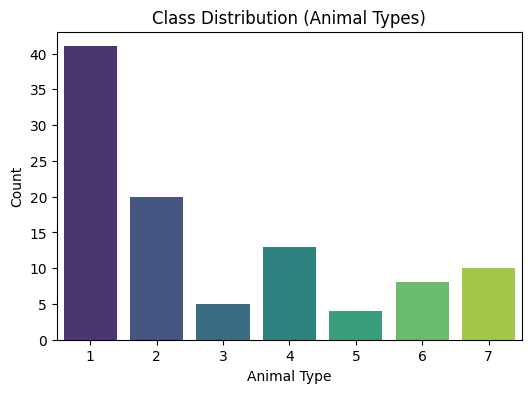

In [3]:
# Cell 2 – Basic EDA (Corrected for Zoo Dataset)

print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())

print("\nMissing Values per Column:")
print(df.isnull().sum())

print("\nStatistical Summary:")
print(df.describe())

# Class distribution (target column is 'type')
plt.figure(figsize=(6,4))
sns.countplot(x='type', data=df, palette='viridis')
plt.title('Class Distribution (Animal Types)')
plt.xlabel('Animal Type')
plt.ylabel('Count')
plt.show()


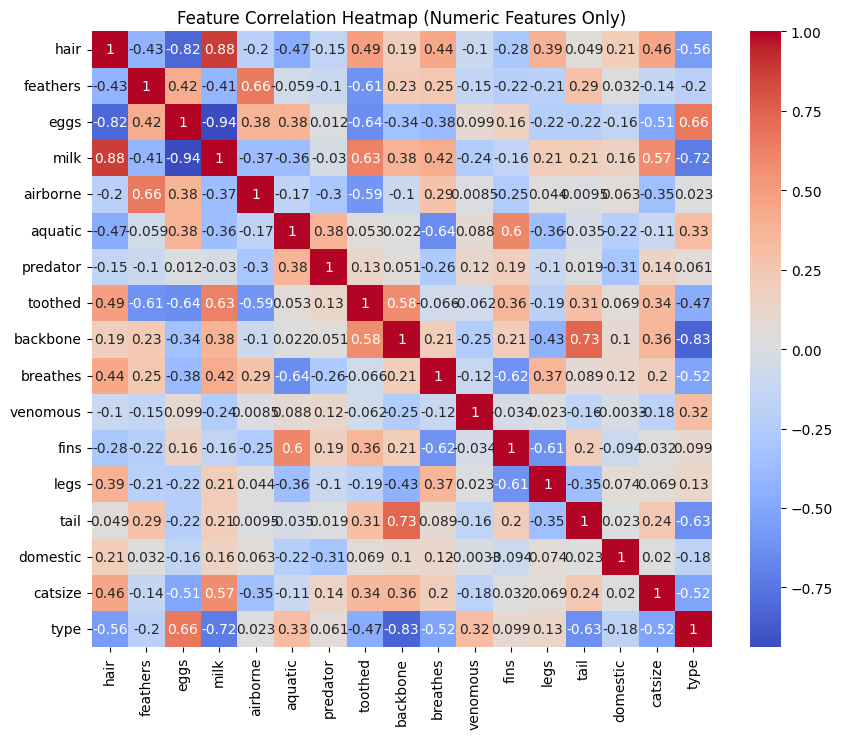

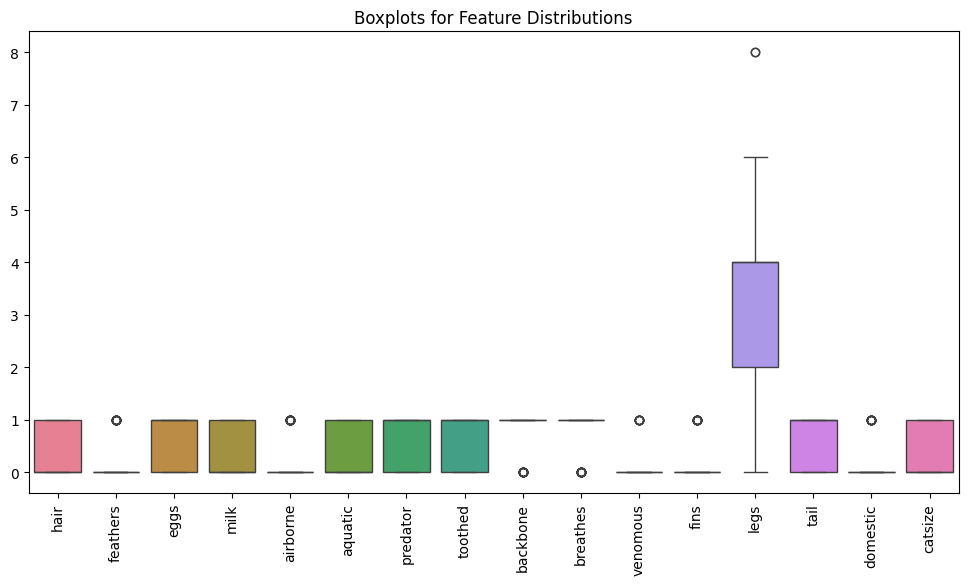

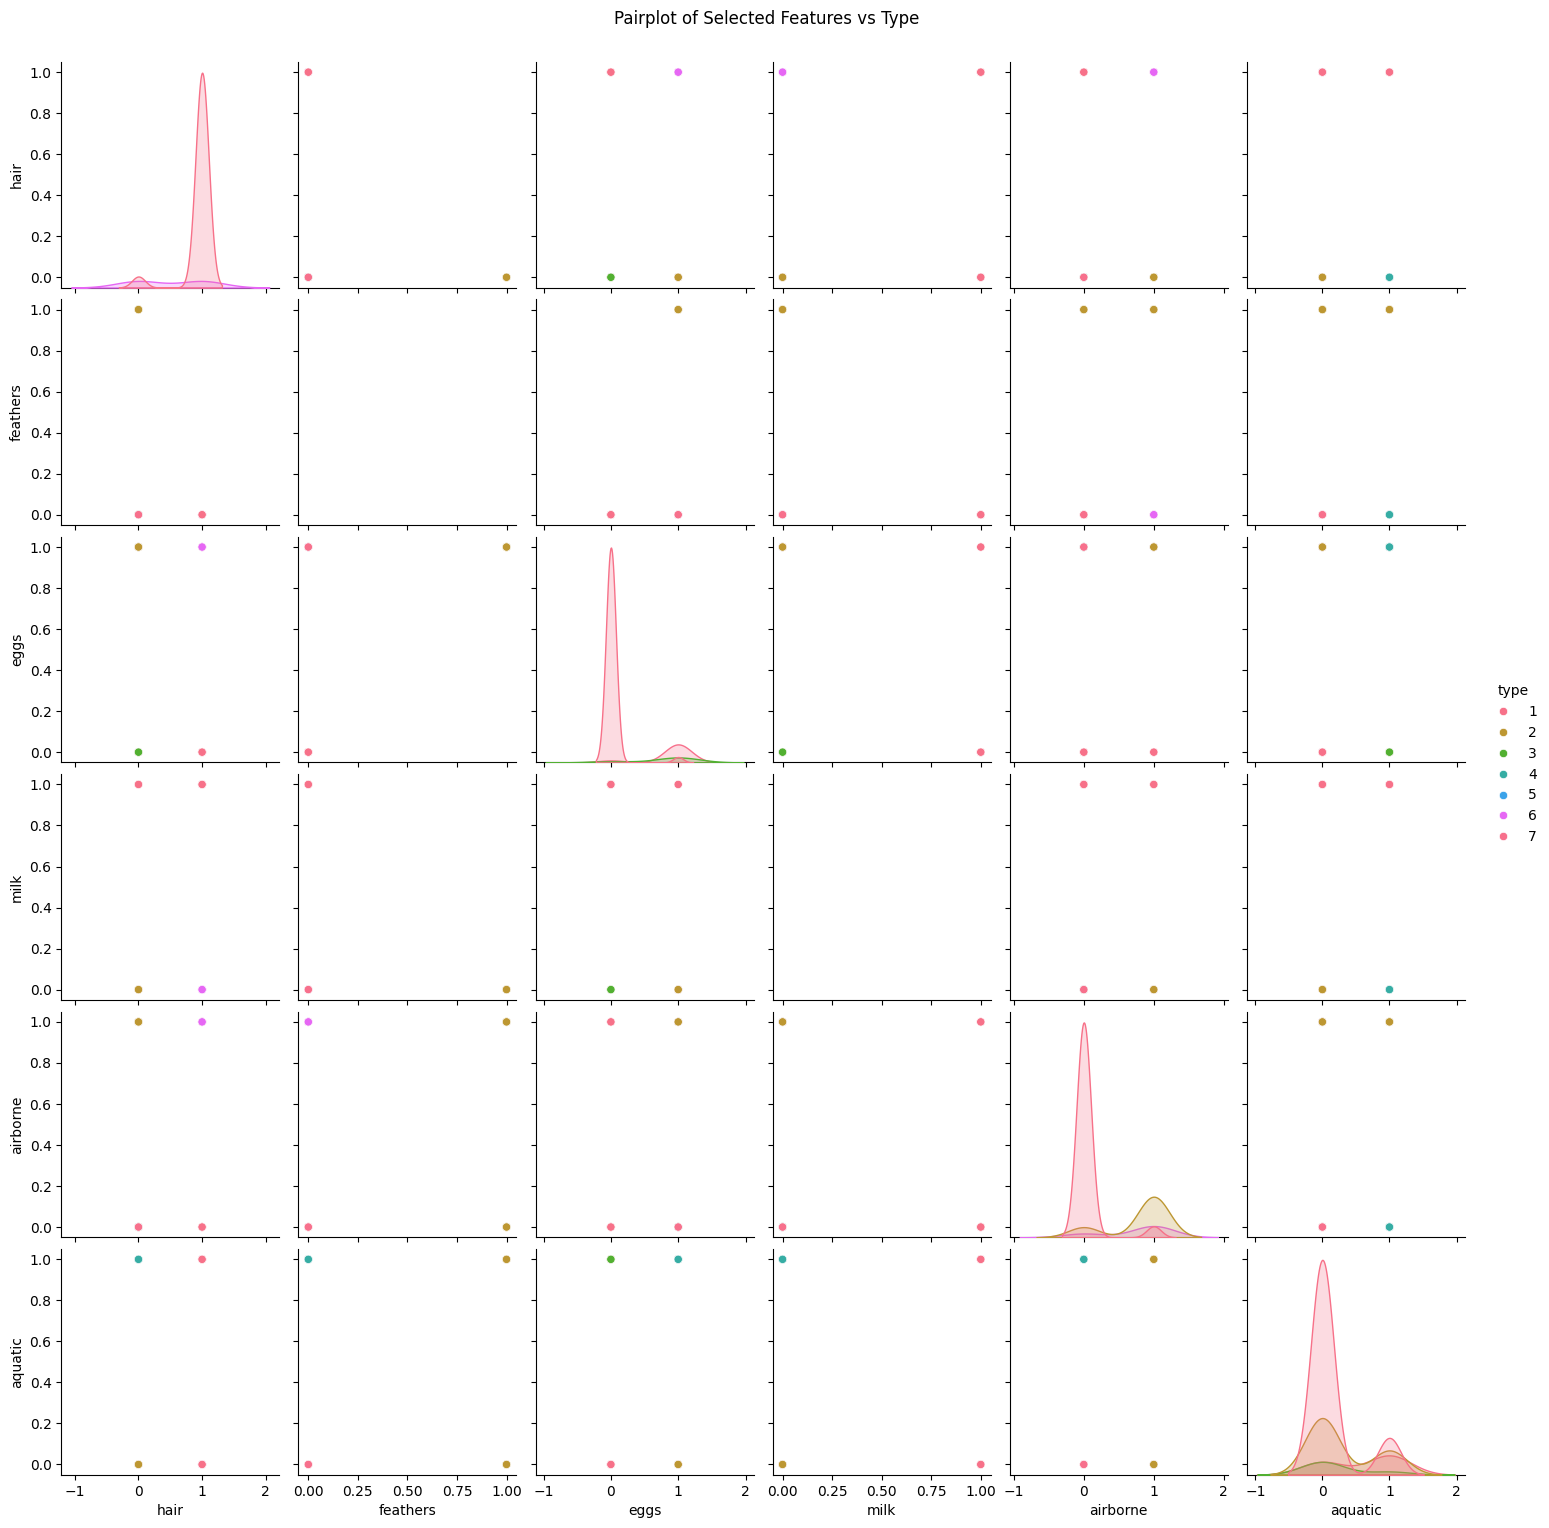

In [6]:
# Cell 3 – Data Visualization (Final Fixed)

# Drop non-numeric columns for correlation analysis
numeric_df = df.drop(columns=['animal name'], errors='ignore')

# Correlation heatmap (numeric features only)
plt.figure(figsize=(10,8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap (Numeric Features Only)")
plt.show()

# Boxplot for numeric feature distributions (excluding target 'type')
plt.figure(figsize=(12,6))
sns.boxplot(data=numeric_df.drop(columns=['type'], errors='ignore'))
plt.title("Boxplots for Feature Distributions")
plt.xticks(rotation=90)
plt.show()

# Pairplot for selected features with target
selected_features = ['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic', 'type']
sns.pairplot(df[selected_features], hue='type', palette='husl')
plt.suptitle("Pairplot of Selected Features vs Type", y=1.02)
plt.show()


In [7]:
# Cell 4 – Data Preprocessing (Missing Values & Outliers)

# Copy dataset to avoid modifying original
df_clean = df.copy()

# Drop the 'animal name' column as it is not useful for modeling
df_clean.drop(columns=['animal name'], inplace=True, errors='ignore')

# Check for missing values
print("Missing Values per Column:\n", df_clean.isnull().sum())

# Handle missing values (if any)
df_clean.fillna(df_clean.median(numeric_only=True), inplace=True)

# Identify numeric columns (excluding target)
numeric_cols = df_clean.drop(columns=['type']).select_dtypes(include=['int64', 'float64']).columns

# Detect outliers using the IQR method
Q1 = df_clean[numeric_cols].quantile(0.25)
Q3 = df_clean[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a mask for non-outlier data
non_outliers = ~((df_clean[numeric_cols] < (Q1 - 1.5 * IQR)) | (df_clean[numeric_cols] > (Q3 + 1.5 * IQR))).any(axis=1)
df_clean = df_clean[non_outliers]

print("\nDataset shape after outlier removal:", df_clean.shape)

# Feature scaling – Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = df_clean.drop('type', axis=1)
y = df_clean['type']

X_scaled = scaler.fit_transform(X)

print("\nData preprocessing complete. Feature matrix and target variable ready for model training.")


Missing Values per Column:
 hair        0
feathers    0
eggs        0
milk        0
airborne    0
aquatic     0
predator    0
toothed     0
backbone    0
breathes    0
venomous    0
fins        0
legs        0
tail        0
domestic    0
catsize     0
type        0
dtype: int64

Dataset shape after outlier removal: (33, 17)

Data preprocessing complete. Feature matrix and target variable ready for model training.


Training set shape: (26, 16)
Testing set shape: (7, 16)

KNN Model Performance Metrics:
Accuracy  : 0.8571
Precision : 0.7347
Recall    : 0.8571
F1-Score  : 0.7912

Classification Report:
               precision    recall  f1-score   support

           1       0.86      1.00      0.92         6
           3       0.00      0.00      0.00         1

    accuracy                           0.86         7
   macro avg       0.43      0.50      0.46         7
weighted avg       0.73      0.86      0.79         7



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/m

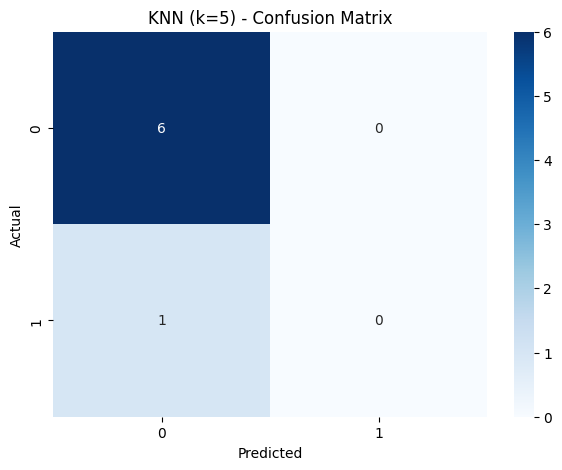

In [8]:
# Cell 5 – Train-Test Split and KNN Model Training

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

# Choose optimal K (we’ll start with k=5)
k = 5
knn = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)  # Euclidean distance

# Train the model
knn.fit(X_train, y_train)

# Predictions
y_pred = knn.predict(X_test)

# Evaluate model performance
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='weighted')
rec = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("\nKNN Model Performance Metrics:")
print(f"Accuracy  : {acc:.4f}")
print(f"Precision : {prec:.4f}")
print(f"Recall    : {rec:.4f}")
print(f"F1-Score  : {f1:.4f}")

# Detailed classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7,5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title(f"KNN (k={k}) - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/tmp/ipython-input-2539820266.py:28: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='cool', edgecolor='k', marker='x', label='Testing')


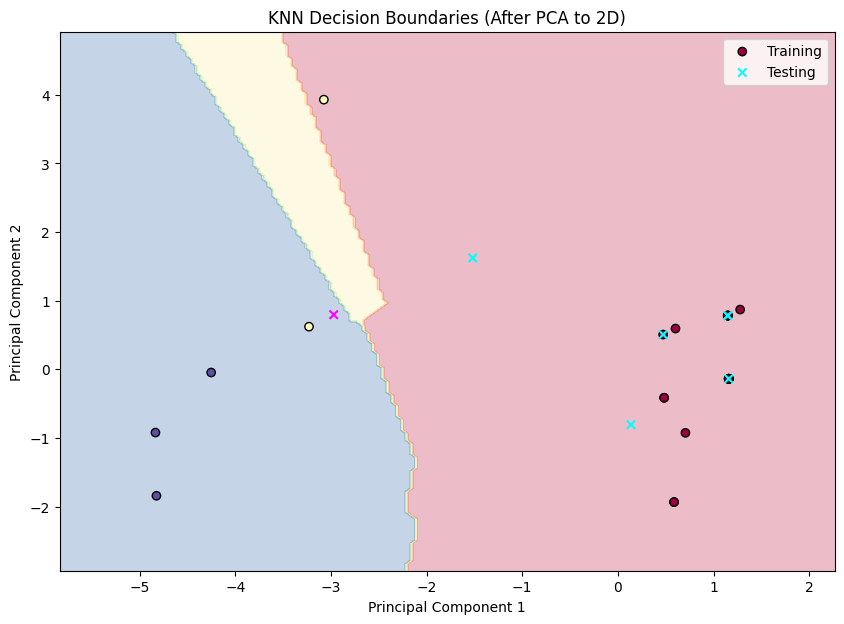

In [9]:
# Cell 6 – Decision Boundary Visualization using PCA

from sklearn.decomposition import PCA

# Reduce features to 2D using PCA for visualization
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Retrain KNN on 2D transformed data for visualization
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train_pca, y_train)

# Create meshgrid for decision boundary
x_min, x_max = X_train_pca[:, 0].min() - 1, X_train_pca[:, 0].max() + 1
y_min, y_max = X_train_pca[:, 1].min() - 1, X_train_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                     np.arange(y_min, y_max, 0.05))

# Predict over grid
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary
plt.figure(figsize=(10,7))
plt.contourf(xx, yy, Z, alpha=0.3, cmap='Spectral')
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap='Spectral', edgecolor='k', label='Training')
plt.scatter(X_test_pca[:, 0], X_test_pca[:, 1], c=y_test, cmap='cool', edgecolor='k', marker='x', label='Testing')
plt.title("KNN Decision Boundaries (After PCA to 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.show()
